# Time evolution visualization

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import h5py
from spectral import basis


## Unravelling the spectral method solution

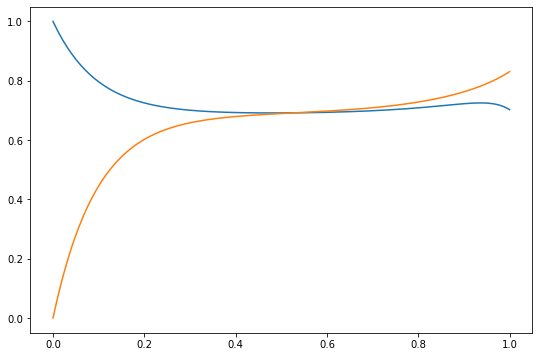

In [7]:
with h5py.File("./output/thermal_2phase_1D/T_steady_flux/solution_cheby100.h5", 'r') as f:
    solution = f["solution"][()]

xi_pt = np.linspace(-1, 1, 200)
x_pt = (1 + xi_pt)/2
t_pt = np.arange(0, 1, 1e-3)
cheby_eval = basis.ChebyshevTSpace(np.arange(100), xi_pt)

Tf_solution = cheby_eval(solution[:100])
Ts_solution = cheby_eval(solution[100:])

plt.figure(figsize=(9, 6))
plt.plot(x_pt, Tf_solution)
plt.plot(x_pt, Ts_solution)
plt.show()

In [31]:
with h5py.File("./output/thermal_2phase_1D/T_evolution/solution_cheby100.h5", 'r') as f:
    solution = f["solution"][()]

xi_pt = np.linspace(-1, 1, 200)
x_pt = (1 + xi_pt)/2
t_pt = np.arange(0, 1, 1e-3)
cheby_eval = basis.ChebyshevTSpace(np.arange(100), xi_pt)

Tf_solution = np.zeros((x_pt.size, t_pt.size))
Ts_solution = np.zeros((x_pt.size, t_pt.size))

for t_id, solution_step in enumerate(solution):
    Tf_solution[:, t_id] = cheby_eval(solution_step[:100])
    Ts_solution[:, t_id] = cheby_eval(solution_step[100:])

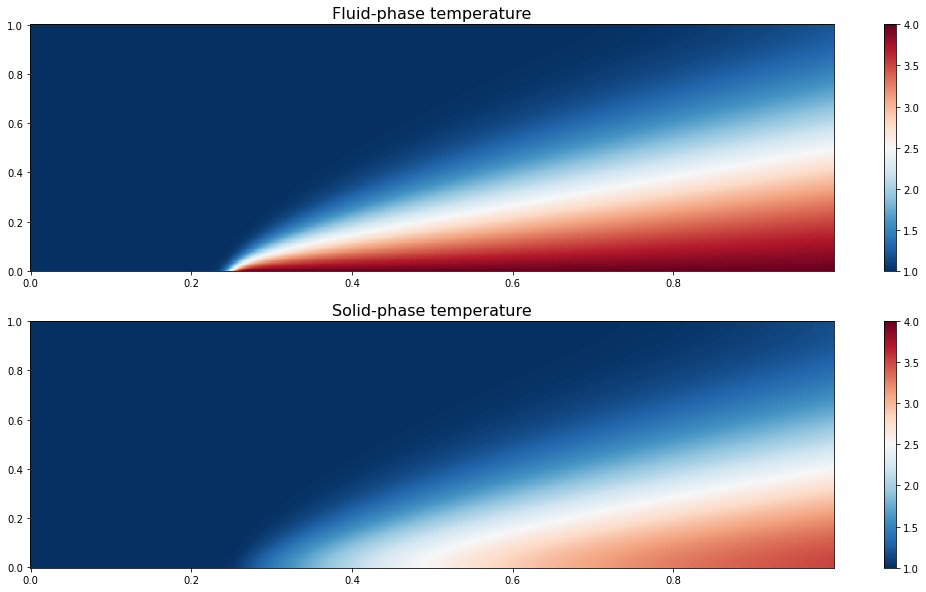

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
X_mesh, T_mesh = np.meshgrid(x_pt, t_pt, indexing="ij")

ax = axes[0]
im = ax.pcolormesh(T_mesh, X_mesh, Tf_solution, cmap="RdBu_r", shading="nearest", clim=[1, 4])
plt.colorbar(im, ax=ax)
ax.set_title("Fluid-phase temperature", fontsize=16)

ax = axes[1]
im = ax.pcolormesh(T_mesh, X_mesh, Ts_solution, cmap="RdBu_r", shading="nearest", clim=[1, 4])
plt.colorbar(im, ax=ax)
ax.set_title("Solid-phase temperature", fontsize=16)

plt.show()

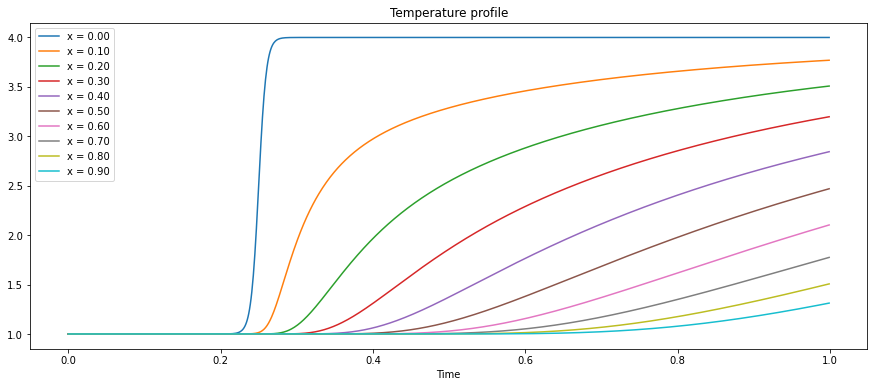

In [55]:
plt.figure(figsize=(15, 6))
for i_x in range(0, 200, 20):
    plt.plot(t_pt, Tf_solution[i_x, :], label="x = {:.2f}".format(x_pt[i_x]))
plt.legend()
plt.title("Temperature profile")
plt.xlabel("Time")
plt.show()

## Unravelling FEM solution

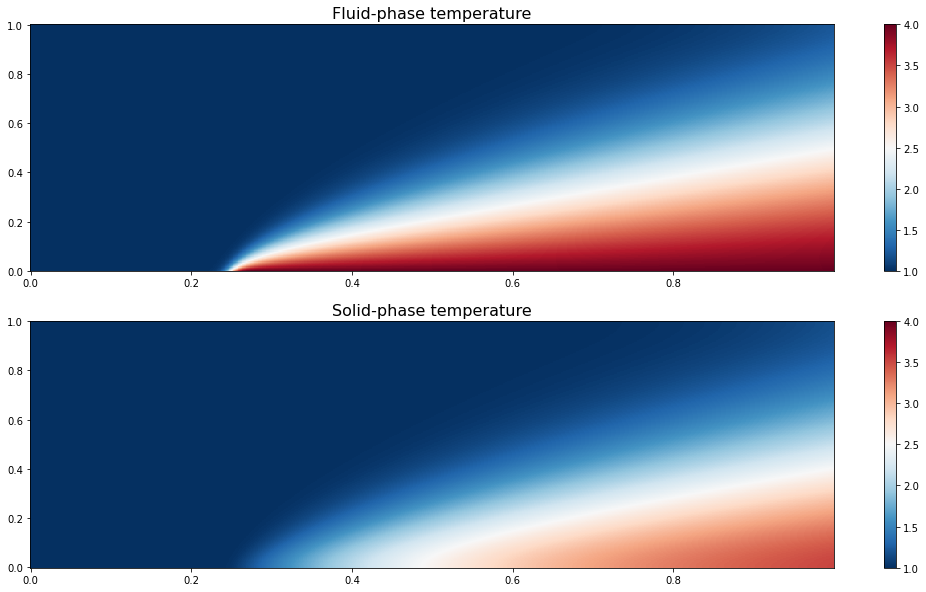

In [5]:
with h5py.File("./output/thermal_2phase_1D/T_evolution/solution_fem100.h5", 'r') as f:
    solution_fem = f["solution"][()]
    x_fem = f["mesh"][()]
t_fem = np.arange(0, 1, 1e-3)

Tf_fem = solution_fem[:, ::2]
Ts_fem = solution_fem[:, 1::2]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
X_fem, T_fem = np.meshgrid(x_fem, t_fem, indexing="ij")

ax = axes[0]
im = ax.pcolormesh(T_fem, X_fem, Tf_fem.T, cmap="RdBu_r", shading="nearest", clim=[1, 4])
plt.colorbar(im, ax=ax)
ax.set_title("Fluid-phase temperature", fontsize=16)

ax = axes[1]
im = ax.pcolormesh(T_fem, X_fem, Ts_fem.T, cmap="RdBu_r", shading="nearest", clim=[1, 4])
plt.colorbar(im, ax=ax)
ax.set_title("Solid-phase temperature", fontsize=16)

plt.show()

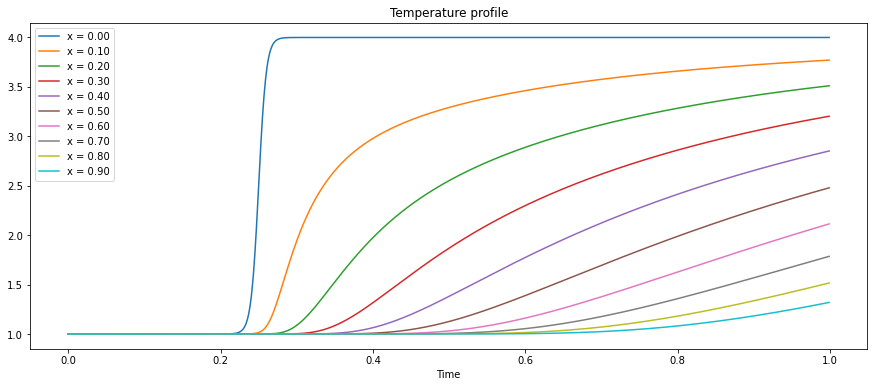

In [6]:
plt.figure(figsize=(15, 6))
for i_x in range(0, 200, 20):
    plt.plot(t_fem, Tf_fem[:, i_x], label="x = {:.2f}".format(x_fem[i_x]))
plt.legend()
plt.title("Temperature profile")
plt.xlabel("Time")
plt.show()

## Validate long time series solution

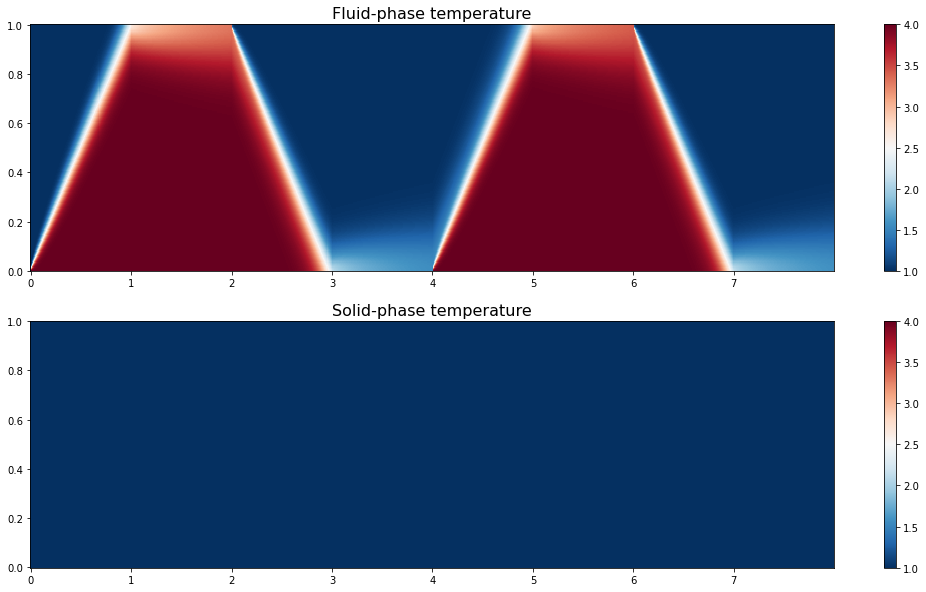

In [22]:
with h5py.File("./output/thermal_2phase_1D_valid/T_evolution/solution_fem100_explicit.h5", 'r') as f:
    solution_fem = f["solution"][::100, :]
    x_fem = f["mesh"][()]
t_fem = np.arange(0, 8, 1e-2)

Tf_fem = solution_fem[:, ::2]
Ts_fem = solution_fem[:, 1::2]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
X_fem, T_fem = np.meshgrid(x_fem, t_fem, indexing="ij")

ax = axes[0]
im = ax.pcolormesh(T_fem, X_fem, Tf_fem.T, cmap="RdBu_r", shading="nearest", clim=[1, 4])
plt.colorbar(im, ax=ax)
ax.set_title("Fluid-phase temperature", fontsize=16)

ax = axes[1]
im = ax.pcolormesh(T_fem, X_fem, Ts_fem.T, cmap="RdBu_r", shading="nearest", clim=[1, 4])
plt.colorbar(im, ax=ax)
ax.set_title("Solid-phase temperature", fontsize=16)

plt.show()

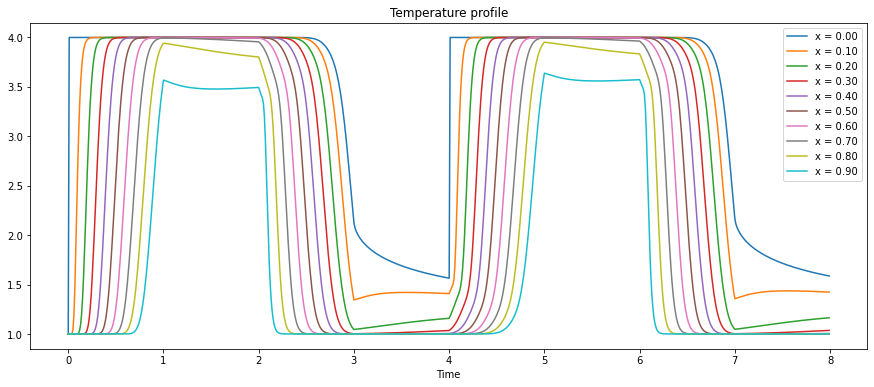

In [23]:
plt.figure(figsize=(15, 6))
for i_x in range(0, 200, 20):
    plt.plot(t_fem, Tf_fem[:, i_x], label="x = {:.2f}".format(x_fem[i_x]))
plt.legend()
plt.title("Temperature profile")
plt.xlabel("Time")
plt.show()